In [1]:
import numpy as np

In [2]:
data = np.loadtxt("real_data_v12_metric_diff.csv", skiprows=1, delimiter=",")

In [3]:
Umu4_sq = data[:,0]
Utau4_sq = data[:,1]
metric_diff = data[:,2]

In [4]:
def matelem2angles(u_mu4, u_tau4):
    sin2_th24 = u_mu4
    cos2_th24 = 1 - sin2_th24
    sin2_th34 = u_tau4 / cos2_th24
    th24 = np.arcsin(np.sqrt(sin2_th24))
    th34 = np.arcsin(np.sqrt(sin2_th34))
    return th24, th34


def angles2matelem(th24, th34):
    u_mu4 = np.sin(th24) ** 2
    u_tau4 = np.sin(th34) ** 2 * (1 - u_mu4)
    return u_mu4, u_tau4

In [5]:
from scipy.interpolate import LinearNDInterpolator
from scipy.spatial import Delaunay

In [6]:
th24, th34 = matelem2angles(Umu4_sq, Utau4_sq)
points = np.vstack((th24, th34)).T
# points = np.log(np.vstack((Umu4_sq, Utau4_sq)).T)
delaunay = Delaunay(points)
interp = LinearNDInterpolator(delaunay, metric_diff)

In [7]:
import matplotlib.pyplot as plt

In [8]:
Umu4_plot = np.geomspace(0.001, 0.3, 100)
Utau4_plot = np.geomspace(0.001, 0.2, 101)
X, Y = np.meshgrid(Umu4_plot, Utau4_plot)

th24_plot, th34_plot = matelem2angles(X.ravel(), Y.ravel())

Z = interp(th24_plot, th34_plot).reshape(X.shape)

[]

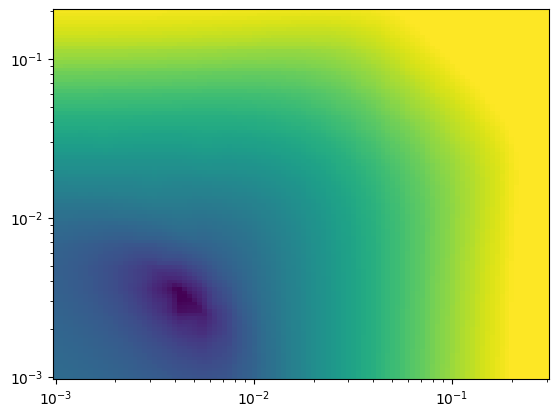

In [9]:
from matplotlib.colors import LogNorm
plt.pcolormesh(X, Y, Z, norm=LogNorm(vmin=0.001, vmax=100))
plt.loglog()

0.05339231038614915 0.07518504901350648


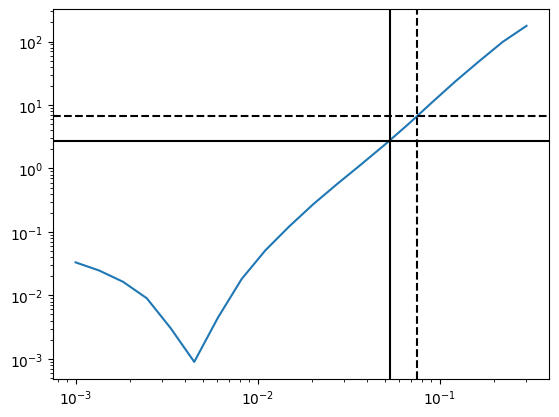

In [10]:
from scipy.optimize import root_scalar
from scipy.stats import chi2

def marginalized_umu4_metric(umu4):
    return np.interp(umu4, Umu4_plot, np.min(Z, axis=0))

wilks_90pct = chi2.ppf(0.9, df=1)
wilks_99pct = chi2.ppf(0.99, df=1)

limit_90 = root_scalar(
    lambda x: marginalized_umu4_metric(x) - wilks_90pct,
    bracket=(1e-2, 0.2)
).root

limit_99 = root_scalar(
    lambda x: marginalized_umu4_metric(x) - wilks_99pct,
    bracket=(1e-2, 0.2)
).root

plt.plot(np.geomspace(1e-3, 0.3, 20), marginalized_umu4_metric(np.geomspace(1e-3, 0.3, 20)))
plt.axvline(x=limit_90, color="k")
plt.axhline(y=wilks_90pct, color="k")

plt.axvline(x=limit_99, color="k", linestyle="--")
plt.axhline(y=wilks_99pct, color="k", linestyle="--")

plt.loglog()

print(limit_90, limit_99)

0.05735540423310737 0.08176348647720767


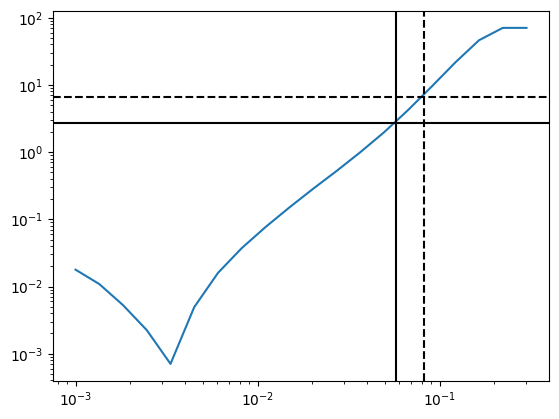

In [11]:
def marginalized_utau4_metric(utau4):
    return np.interp(utau4, Utau4_plot, np.min(Z, axis=1))

wilks_90pct = chi2.ppf(0.9, df=1)
wilks_99pct = chi2.ppf(0.99, df=1)

limit_90 = root_scalar(
    lambda x: marginalized_utau4_metric(x) - wilks_90pct,
    bracket=(1e-2, 0.2)
).root

limit_99 = root_scalar(
    lambda x: marginalized_utau4_metric(x) - wilks_99pct,
    bracket=(1e-2, 0.2)
).root

plt.plot(np.geomspace(1e-3, 0.3, 20), marginalized_utau4_metric(np.geomspace(1e-3, 0.3, 20)))
plt.axvline(x=limit_90, color="k")
plt.axhline(y=wilks_90pct, color="k")

plt.axvline(x=limit_99, color="k", linestyle="--")
plt.axhline(y=wilks_99pct, color="k", linestyle="--")

plt.loglog()

print(limit_90, limit_99)